In [29]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
with open('train.json', 'r') as f:
    datastore = json.load(f)

In [31]:
for recipe in datastore:
    new_ingredients = [i.lower().replace("-", ' ').split(',', 1)[0] for i in recipe['ingredients']]
    recipe['new_ingredients'] = new_ingredients

In [32]:
df = pd.DataFrame.from_dict(json_normalize(datastore), orient='columns')

In [33]:
v = df.new_ingredients.values
l = [len(x) for x in v.tolist()]
f, u = pd.factorize(np.concatenate(v))
n, m = len(v), u.size
i = np.arange(n).repeat(l)

dummies = pd.DataFrame(
    np.bincount(i * m + f, minlength=n * m).reshape(n, m),
    df.index, u
)

one_hot = df.drop('ingredients', 1).join(dummies)


In [34]:
one_hot=one_hot.drop('new_ingredients',1)

In [35]:
one_hot

cuisine     id  romaine lettuce  black olives  grape tomatoes  \
0             greek  10259                1             1               1   
1       southern_us  25693                0             0               0   
2          filipino  20130                0             0               0   
3            indian  22213                0             0               0   
4            indian  13162                0             0               0   
5          jamaican   6602                0             0               0   
6           spanish  42779                0             0               0   
7           italian   3735                0             0               0   
8           mexican  16903                0             0               0   
9           italian  12734                0             0               0   
10          italian   5875                0             1               0   
11          chinese  45887                0             0               0   
12          italian   2698                0             0               0   
13          mexican  41995                0             0               0   
14          italian  31908                0             0               0   
15           indian  24717                0             0               0   
16          british  34466                0             0               0   
17          italian   1420                0             0               0   
18             thai   2941                0             0               0   
19       vietnamese   8152                0             0               0   
20             thai  13121                0             0               0   
21          mexican  40523                0             0               0   
22      southern_us  40989                0             0               0   
23          chinese  29630                0             0               0   
24          italian  49136                0             0               0   
25          chinese  26705                0             0               0   
26     cajun_creole  27976                0             0               0   
27          italian  22087                0             0               0   
28          chinese   9197                0             0               0   
29          mexican   1299                0             0               0   
...             ...    ...              ...           ...             ...   
39744         greek   5680                0             0               0   
39745       spanish   5511                0             0               0   
39746        indian  32051                0             0               0   
39747      moroccan   5119                0             0               0   
39748       italian   9526                0             0               0   
39749       mexican  45599                0             0               0   
39750       mexican  49670                0             0               0   
39751      moroccan  30735                0             0               0   
39752   southern_us   5911                0             0               0   
39753       italian  33294                0             0               0   
39754    vietnamese  27082                0             0               0   
39755        indian  36337                0             0               0   
39756       mexican  15508                0             0               0   
39757         greek  34331                0             0               0   
39758         greek  47387                0             0               0   
39759        korean  12153                0             0               0   
39760   southern_us  41840                0             0               0   
39761       chinese   6487                0             0               0   
39762        indian  26646                0             0               0   
39763       italian  44798                0             0               0   
39764   

In [36]:
counts = dummies.sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

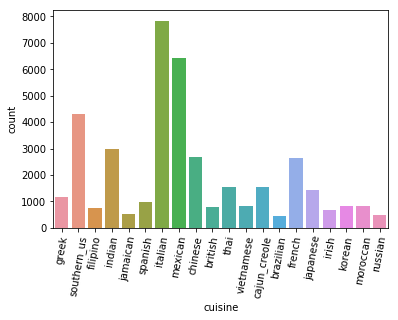

In [37]:
g = sns.countplot(x="cuisine", data=one_hot)
plt.xticks(rotation=80)

In [52]:
#file = open("testfile.txt","w") 
#file.writelines( "%s\n" % item for item in one_hot.columns )
#file.close()

In [53]:
#counts.sort_values(ascending=False)

salt                                                   18049
onions                                                  7972
olive oil                                               7972
water                                                   7457
garlic                                                  7380
sugar                                                   6434
garlic cloves                                           6237
butter                                                  4848
ground black pepper                                     4785
all purpose flour                                       4632
pepper                                                  4438
vegetable oil                                           4385
eggs                                                    3388
soy sauce                                               3296
kosher salt                                             3113
green onions                                            3078
tomatoes                

In [11]:
one_hot

cuisine     id                                    new_ingredients  \
0             greek  10259  [romaine lettuce, black olives, grape tomatoes...   
1       southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...   
2          filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3            indian  22213                [water, vegetable oil, wheat, salt]   
4            indian  13162  [black pepper, shallots, cornflour, cayenne pe...   
5          jamaican   6602  [plain flour, sugar, butter, eggs, fresh ginge...   
6           spanish  42779  [olive oil, salt, medium shrimp, pepper, garli...   
7           italian   3735  [sugar, pistachio nuts, white almond bark, flo...   
8           mexican  16903  [olive oil, purple onion, fresh pineapple, por...   
9           italian  12734  [chopped tomatoes, fresh basil, garlic, extra ...   
10          italian   5875  [pimentos, sweet pepper, dried oregano, olive ...   
11          chinese  45887  [low sodium soy sauce, fresh ginger, dry musta...   
12          italian   2698  [italian parsley leaves, walnuts, hot red pepp...   
13          mexican  41995  [ground cinnamon, fresh cilantro, chili powder...   
14          italian  31908  [fresh parmesan cheese, butter, all purpose fl...   
15           indian  24717  [tumeric, vegetable stock, tomatoes, garam mas...   
16          british  34466  [greek yogurt, lemon curd, confectioners sugar...   
17          italian   1420  [italian seasoning, broiler fryer chicken, may...   
18             thai   2941   [sugar, hot chili, asian fish sauce, lime juice]   
19       vietnamese   8152  [soy sauce, vegetable oil, red bell pepper, ch...   
20             thai  13121  [pork loin, roasted peanuts, chopped cilantro ...   
21          mexican  40523  [roma tomatoes, kosher salt, purple onion, jal...   
22      southern_us  40989  [low fat mayonnaise, pepper, salt, baking pota...   
23          chinese  29630  [sesame seeds, red pepper, yellow peppers, wat...   
24          italian  49136  [marinara sauce, flat leaf parsley, olive oil,...   
25          chinese  26705  [sugar, lo mein noodles, salt, chicken broth, ...   
26     cajun_creole  27976  [herbs, lemon juice, fresh tomatoes, paprika, ...   
27          italian  22087  [ground black pepper, butter, sliced mushrooms...   
28          chinese   9197  [green bell pepper, egg roll wrappers, sweet a...   
29          mexican   1299  [flour tortillas, cheese, breakfast sausages, ...   
...             ...    ...                                                ...   
39744         greek   5680  [extra virgin olive oil, oregano, potatoes, ga...   
39745       spanish   5511  [quinoa, extra virgin olive oil, fresh thyme l...   
39746        indian  32051  [clove, bay leaves, ginger, chopped cilantro, ...   
39747      moroccan   5119  [water, sugar, grated lemon zest, butter, pitt...   
39748       italian   9526  [sea salt, pizza doughs, all purpose flour, co...   
39749       mexican  45599  [kosher salt, minced onion, tortilla chips, su...   
39750       mexican  49670  [ground black pepper, chicken breasts, salsa, ...   
39751      moroccan  30735  [olive oil, cayenne pepper, chopped cilantro f...   
39752   southern_us   5911  [self rising flour, milk, white sugar, butter,...   
39753       italian  33294  [rosemary sprigs, lemon zest, garlic cloves, g...   
39754    vietnamese  27082  [jasmine rice, bay leaves, sticky rice, rotiss...   
39755        indian  36337  [mint leaves, cilantro leaves, ghee, tomatoes,...   
39756       mexican  15508  [vegetable oil, cinnamon sticks, water, all pu...   
39757         greek  34331  [red bell pepper, garlic cloves, extra virgin ...   
39758         greek  47387  [milk, salt, ground cayenne pepper, ground lam...   
39759        korean  12153  [red chili peppers, sea salt, onions, water, c...   
39760   southern_us  41840  [butter, large eggs, cornmeal, baking powder, ...   
39761       chinese   6487  [honey, chicken

In [38]:
X = one_hot[one_hot.columns.difference(['cuisine', 'id'])]
y = one_hot['cuisine']

In [39]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=43)
y_train = y_train.reset_index(drop=True)

NameError: name 'ms' is not defined

In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
